#  Padulles-Amphlett Dynamic Model

### Version 0.9

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions: 
<ol>    
<li>The stack is fed with hydrogen and air</li>    
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>  
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li>  
</ol>
</p>

<p style="text-align:justify;">
This model is an integration of Padulles-Hauer dynamic model with Amphlett static model. The advantage of this dynamic model is using Amphlett equation for simulating the polarization values. Amphlett model as the most complicated and preferable static model, but the most precise. Based on this model, the obtained polarization voltage is identical to the experimental results.  
</p>    

<div style="text-align:center;">
    
<img src="images/Padulles-Amphlett-Diagram.jpg">  
<p style="text-align:center;">Fig1. Padulles-Amphlett Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$\frac{q_{H_2}^{(inlet)}}{q_{methanol}}=\frac{CV}{\tau_{1}^{(s)}+(\tau_{2}^{(s)})^2+(\tau_{1}+\tau_{2})^{(s)}+1}$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$P_{H_2O}=\frac{\frac{1}{K_{H_2O}}}{1+\tau_{H_2O}^{(s)}}[(q_{H_2O}^{(inlet)}-(2\times K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

$$q_{H_2O}^{(inlet)}=q_{H_2}^{(inlet)}$$

In [1]:
from opem.Dynamic.Padulles_Amphlett import qH2_Calc,Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,PH2O_Calc,Enernst_Calc

In [2]:
qH2=qH2_Calc(qMethanol=0.0002,CV=2,t1=2,t2=2)
qH2

3.6363636363636364e-05

In [3]:
Kr=Kr_Calc(N0=5)
Kr

1.2955435375179044e-08

In [4]:
qO2=qO2_Calc(qH2=qH2,rho=1.168)
qO2

3.113325031133251e-05

In [5]:
PH2=PH2_Calc(KH2=0.0000422,tH2=3.37,Kr=Kr,I=1,qH2=qH2)
PH2

0.19704428889827239

In [6]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

0.1905549730945132

In [7]:
PH2O=PH2O_Calc(KH2O=0.000007716,tH2O=18.418,Kr=Kr,I=1,qH2O=qH2)
PH2O

0.2425275190047356

In [8]:
Enernst=Enernst_Calc(E0=0.6,N0=5,T=343, PH2=PH2, PO2=PO2,PH2O=PH2O)
Enernst

2.9234016588243374

## PEM Losses Model

### Activation

$$\eta_{activation}=\xi_{1}+\xi_{2}T+\xi_{3}T[ln(C_{O_{2}})]+\xi_{4}T[ln(i)]$$

$$\xi_{1}=-0.948$$

$$\xi_{2}=0.00286+0.0002\times ln(A)+(4.3\times10^{-5})[ln(C_{H_{2}})]$$

$$\xi_{3}=7.6\times10^{-5}$$

$$\xi_{4}=-1.93\times10^{-4}$$

$$C_{H_{2}}=\frac{P_{H_2}}{1.09\times10^{6}\times exp(\frac{77}{T})}$$

$$C_{O_{2}}=\frac{P_{O_2}}{5.08\times10^{6}\times exp(\frac{-498}{T})}$$

In [9]:
from opem.Dynamic.Padulles_Amphlett import Eta_Act_Calc
Eta_Act=Eta_Act_Calc(T=343,PO2=PO2 , PH2=PH2, i=2, A=50.6)
Eta_Act

0.38390602046791616

### Ohmic

$$\eta_{ohmic}=i(R_{electronic}+R_{Proton})$$

$$R_{Proton}=\frac{\rho_m\times I}{A}$$

$$\rho_m=\frac{181.6[1+0.03(\frac{i}{A})+0.062(\frac{T}{303})^2(\frac{i}{A})^{2.5}]}{[\lambda-0.634-3(\frac{i}{A})]exp[4.18(\frac{T-303}{T})]}$$

* `Relectronic` Should be approximately constant over the relatively narrow
temperature range of PEM fuel cell operation.
Therefore, the parameter Relectronic can be taken as a constant, but
is generally difficult to predict and, therefore, is initially an unknown.

In [10]:
from opem.Dynamic.Padulles_Amphlett import Eta_Ohmic_Calc
Eta_Ohmic=Eta_Ohmic_Calc(i=2, l=0.0178, A=50.6, T=343, lambda_param=23, R_elec=0)
Eta_Ohmic

0.003531492225469087

### Concentration

$$\eta_{Concentration}=-B\times ln(1-\frac{J}{J_{Max}})$$

$$J=\frac{i}{A}$$

$$J_{Max}=\frac{i_L}{A}$$

In [11]:
from opem.Dynamic.Padulles_Amphlett import Eta_Conc_Calc
Eta_Conc=Eta_Conc_Calc(i=2, A=50.6, B=0.016, JMax=1.5)
Eta_Conc

0.0004272617031588504

### FC Voltage

$$Loss=\eta_{Activation}+\eta_{Ohmic}+\eta_{Concentration}$$

$$V_{Fuelcell}=E_{Nernst}-N_0\times Loss$$

In [12]:
from opem.Dynamic.Padulles_Amphlett import Loss_Calc,Vcell_Calc
Loss=Loss_Calc(Eta_Act=Eta_Act,Eta_Conc=Eta_Conc,Eta_Ohmic=Eta_Ohmic)
Loss

0.38786477439654415

In [13]:
FC_Voltage=Vcell_Calc(Enernst=Enernst, Loss=Loss, N=5)
FC_Voltage

0.9840777868416166

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [14]:
from opem.Dynamic.Padulles_Amphlett import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

1.9681555736832332

In [15]:
Power_Thermal_Calc(VStack=FC_Voltage,N=5,i=2)

10.331844426316767

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [16]:
from opem.Dynamic.Padulles_Amphlett import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=5)

0.1261638188258483

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0 to `i`=4 with `step`=0.1

In [17]:
Test_Vector={"A":50.6,"l":0.0178,"lambda":23,"JMax":1.5,"T":343,"E0":1.229,"N0":5,"KO2":0.0000211,"KH2":0.0000422,"KH2O":0.000007716,"tH2":3.37,"tO2":6.74,"t1":2,"t2":2,"tH2O":18.418,"B":0.016,"R":0,"rho":1.168,"qMethanol":0.0002,"CV":2,"i-start":0.1,"i-stop":4,"i-step":0.1,"Name":"Test"}

In [18]:
from opem.Dynamic.Padulles_Amphlett import Dynamic_Analysis
Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=False,ReportMode=False)

{'EFF': [0.6589193654570529,
  0.629377818863534,
  0.6120440436878553,
  0.5997083306020967,
  0.5901112348363035,
  0.582246339352968,
  0.5755767905806046,
  0.5697821347125663,
  0.564655672412507,
  0.5600562707690275,
  0.5558832653691355,
  0.5520623292851136,
  0.548537017783373,
  0.5452634554373536,
  0.5422068606479247,
  0.539339194118889,
  0.5366375214822406,
  0.5340828446480225,
  0.5316592495454955,
  0.5293532727253193,
  0.5271534226603188,
  0.5250498125090778,
  0.5230338745789967,
  0.5210981356038789,
  0.5192360379260482,
  0.5174417957708685,
  0.5157102786607133,
  0.5140369160418929,
  0.5124176186550433,
  0.5108487132409738,
  0.5093268879567676,
  0.5078491464607577,
  0.5064127690649867,
  0.5050152796886153,
  0.503654417602863,
  0.5023281131572472,
  0.501034466832334,
  0.4997717310865285,
  0.49853829456127663],
 'I': [0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  1.1,
  1.2,
  1.3,
  1.4,
  1.5,
  1.6,
  1.7,
  1.8,
  1.9,
  

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [19]:
Data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-Amphlett-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [20]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-Amphlett Simulation Failed!(Check Your Inputs)',
 'Status': False}

## Plot

In [21]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

In [22]:
def plot_func(x,y,x_label,y_label,color='green'):
    plt.figure()
    plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


In [23]:
Test_Vector = {
    "A": 50.6,
    "l": 0.0178,
    "lambda": 23,
    "JMax": 1.5,
    "T": 343,
    "N0": 5,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "KH2O": 0.000007716,
    "tH2": 3.37,
    "tO2": 6.74,
    "t1": 2,
    "t2": 2,
    "tH2O": 18.418,
    "B": 0.016,
    "rho": 1.168,
    "qMethanol": 0.0002,
    "CV": 2,
    "i-start": 0.1,
    "i-stop": 75,
    "i-step": 0.1,
    "Name": "Padulles_Amphlett_Test"}
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=False,ReportMode=True)

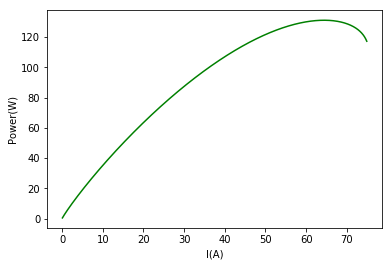

In [24]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

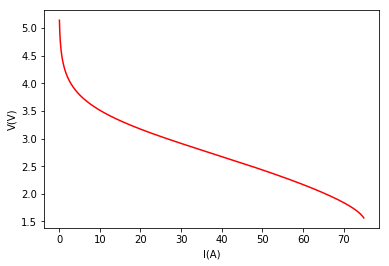

In [25]:
plot_func(data["I"],data["V"],"I(A)","V(V)","red")

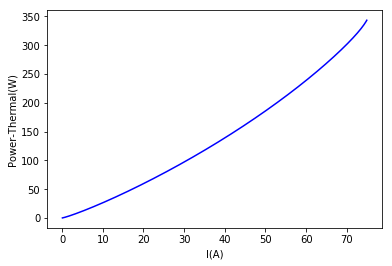

In [26]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

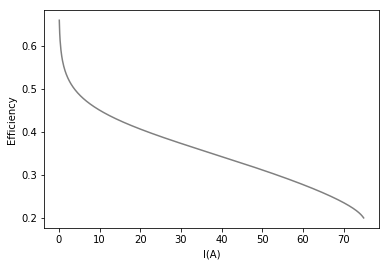

In [27]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

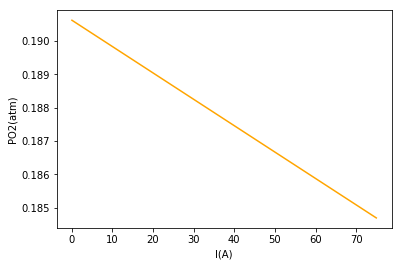

In [28]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

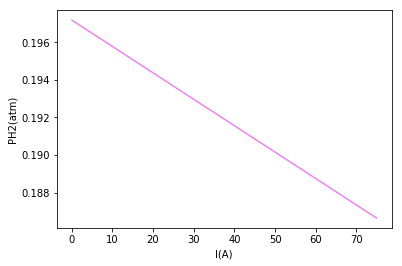

In [29]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

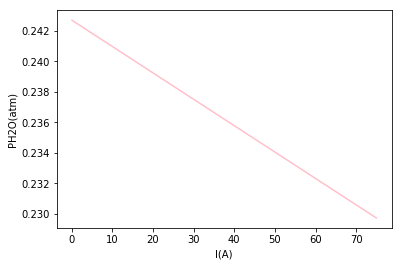

In [30]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.html">HTML File</a>

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.opem">OPEM File</a>

<a href="Padulles-Amphlett/Padulles_Amphlett_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User Input
2. System : Simulator Calculation (Middle Value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">FuelCell temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$N_0$$</td>
        <td style="text-align:center;">Number of cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\tau_{H_2O}^{(s)}$$</td>
        <td style="text-align:center;">Water time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$l$$</td>
        <td style="text-align:center;">Membrane Thickness</td>
        <td>$$cm$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">Active area</td>
        <td>$$cm^2$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{1}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{2}^{(s)}$$</td>
        <td style="text-align:center;">Reformer time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$CV$$</td>
        <td style="text-align:center;">Conversion factor</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">An empirical constant
depending on the cell and its
operation state</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$R_{electronic}$$</td>
        <td style="text-align:center;">R-Electronic</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\lambda$$</td>
        <td style="text-align:center;">An adjustable parameter with a possible minimum value of 14 and a maximum value of 23</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$J_{Max}$$</td>
        <td style="text-align:center;">Maximum current density of the cell</td>
        <td>$$Acm^{-2}$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{methanol}$$</td>
        <td style="text-align:center;">Molar flow of methanol</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$q_{H_2O}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of water</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$J$$</td>
        <td style="text-align:center;">Actual current density of the cell </td>
        <td>$$Acm^{-2}$$</td>
        <td>$$System$$</td>
    </tr> 
    <tr>
        <td>$$C_{O_2}$$</td>
        <td style="text-align:center;">Concentration of oxygen in the catalytic interface of the cathode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$C_{H_2}$$</td>
        <td style="text-align:center;">Concentration of hydrogen in the catalytic interface of the anode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
    <tr>
        <td>$$R_{Proton}$$</td>
        <td style="text-align:center;">Resistance to proton flow</td>
        <td>$$\Omega$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_2$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_1$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-0.948$$</td>
    </tr> 
     <tr>
        <td>$$\xi_3$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$7.6\times10^{-5}$$</td>
    </tr> 
     <tr>
        <td>$$\xi_4$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-1.93\times10^{-4}$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher Heating Value Potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical Potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

* $$q_{H_2}=q_{H_2O}$$

## Reference
<blockquote>
1- J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9
</blockquote>
<blockquote>
2- Hauer, K.-H. 2001. "Analysis tool for fuel cell vehicle hardware and software (controls) with an application
to fuel economy comparisons of alternative system designs." Ph.D. dissertation, Transportation Technology
and Policy, University of California Davis.
</blockquote>
<blockquote>
3- J. C. Amphlett, R. M. Baumert, R. F. Mann, B. A. Peppley, and P. R. Roberge. 1995. "Performance Modeling
of the Ballard Mark IV Solid Polymer Electrolyte Fuel Cell." J. Electrochem. Soc. (The Electrochemical Society,
Inc.) 142 (1): 9-15. doi: 10.1149/1.2043959.
</blockquote>